In [ ]:
import importlib
import tokenizer as to
importlib.reload(to)
from tokenizer import Tokenizer

In [147]:
import test_data as td
importlib.reload(td)
from test_data import set_test_data

set_test_data(
    data_count=None, 
    moving_av=True,
    verbose=False)

DATA = td.DATA

In [93]:
importlib.reload(to)
from tokenizer import Tokenizer

In [91]:
time_stat, value_stat, temperature_stat = Tokenizer.get_statistics(DATA, bins=100)

In [96]:
Tokenizer.set_quantization_levels(time_stat, value_stat, temperature_stat)
print('time levels: ', Tokenizer.time_levels)
print('value levels: ', Tokenizer.temperature_levels)
print('temperature levels: ', Tokenizer.temperature_levels)

time levels:  [4.15, 5.53, 7.38, 9.22, 11.1, 12.5, 14.3, 17.1]
value levels:  [1.82e-05, 1.82e-05, 3.64e-05, 5.46e-05, 7.28e-05, 9.1e-05, 0.000109, 0.000146]
temperature levels:  [1.82e-05, 1.82e-05, 3.64e-05, 5.46e-05, 7.28e-05, 9.1e-05, 0.000109, 0.000146]


Token has three attributes: `time` which is the time duration that it covers, `value` - the mean open value of the ASK and BID candles at the end of its time, and `temperature` that is a measure of candle value fluctuation over the token time. The values of the attributes are quantized to levels listed above.

The quantization levels are established basing on statistics shown below. The quantization steps are chosen to uniformly cover the population of relevant quantities.

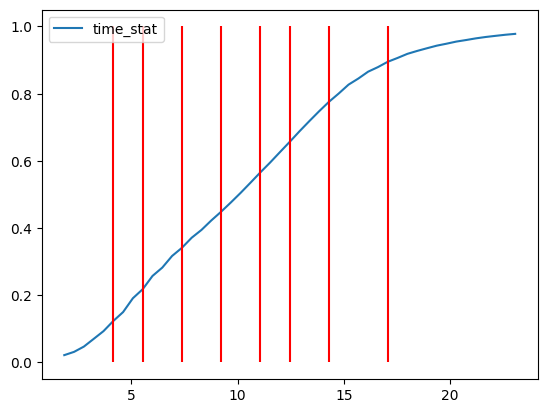

[4.15, 5.53, 7.38, 9.22, 11.1, 12.5, 14.3, 17.1]


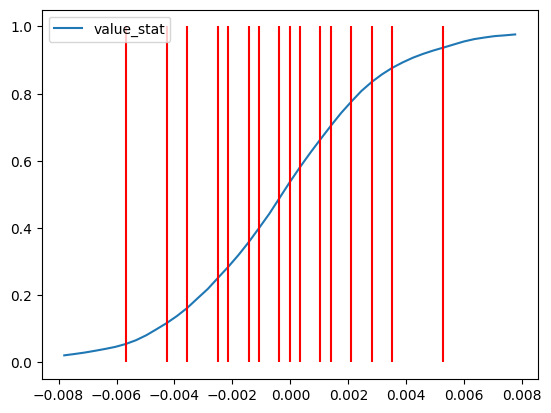

[-0.00568, -0.00427, -0.00356, -0.0025, -0.00214, -0.00144, -0.00108, -0.000377, -2.31e-05, 0.000331, 0.00104, 0.00139, 0.0021, 0.00281, 0.00351, 0.00528]


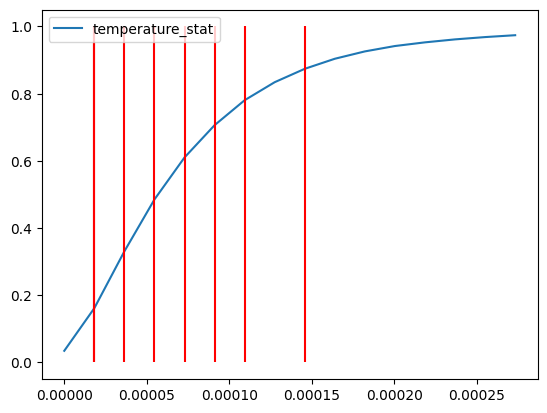

[1.82e-05, 1.82e-05, 3.64e-05, 5.46e-05, 7.28e-05, 9.1e-05, 0.000109, 0.000146]


In [78]:
import math
import numpy as np 
import matplotlib.pyplot as plt

def round_sig(x, sig=3):
    x_ = math.fabs(x)
    retval = round(x_, sig-int(math.floor(math.log10(abs(x_))))-1)
    if x < 0: retval *= -1
    return retval

def histogram(hist, bin_edges, level_count=8, label=''):
    hist_cum = hist.cumsum()
    hist_cum = hist_cum / hist_cum[-1]
    hist_cum = np.append(hist_cum, 1.)
    
    level_dist = 1 / (level_count + 1)
    levels = []

    upper = (np.abs(hist_cum - 0.98).argmin())
    lower = (np.abs(hist_cum - 0.02).argmin())

    plt.plot(bin_edges[lower: upper], hist_cum[lower: upper], label=label)
    for i in range(level_count):
        index = (np.abs(hist_cum - (i + 1) * level_dist).argmin())
        levels.append(bin_edges[index])
        plt.vlines(bin_edges[index], 0, 1, colors='red')

    levels = [round_sig(_) for _ in levels]
    
    plt.legend()
    plt.show()
    print(levels)

histogram(*time_stat, label='time_stat')
histogram(*value_stat, level_count=16, label='value_stat')
histogram(*temperature_stat, label='temperature_stat')

## General Test

In [148]:
import tokenizer as to
importlib.reload(to)
from tokenizer import Tokenizer

set_test_data(
    data_count=None, 
    moving_av=True,
    verbose=False)

DATA = td.DATA

Tokenizer.set_quantization_levels(*Tokenizer.get_statistics(DATA, bins=100))

shift = 1000 
window = 120
data = DATA[shift: shift + window]
token = Tokenizer.get_sentence(data)
print(token)

[(7.4, -0.00108, 0.000146), (14.3, -0.00108, 0.000146), (7.4, -0.000377, 0.000146), (12.5, 0.000331, 0.000146), (11.1, -2.31e-05, 0.000146), (7.4, 0.000331, 0.000146), (4.2, 0.000331, 0.000146), (17.1, 0.000331, 0.000146), (14.3, 0.00139, 0.000146), (7.4, 0.0021, 0.000109), (17.1, 0.00139, 0.000109)]


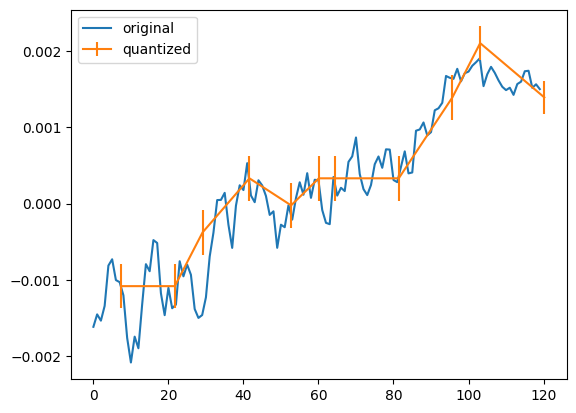

quantized values:  [-1.080e-03 -1.080e-03 -3.770e-04 3.310e-04 -2.310e-05 3.310e-04 3.310e-04
 3.310e-04 1.390e-03 2.100e-03 1.390e-03]


In [129]:
value_org = [(_[1][0][0] + _[1][1][0]) / 2 for _ in data]
time_org = [i for i in range(len(data))]
plt.plot(time_org, value_org, label='original')

time = np.array([_[0] for _ in token]).cumsum()
value = np.array([_[1] for _ in token])
noise = np.array([_[2] for _ in token])

plt.errorbar(time, value, 2 * noise, label='quantized')
plt.legend()
plt.show()
print('quantized values: ', value)

In [135]:
whole_story = Tokenizer.get_whole_story(DATA)
print('whole story word count: ', len(whole_story))

whole story word count:  62095


In [150]:
import collections

word, word_count = Tokenizer.get_words_used(whole_story)
print('word count: ', (Tokenizer.level_count ** 3) * 2 )
print('used word count: ', len(word))
print('most common:\n', word_count[:3])
print('less common:\n', word_count[-3:])

word count:  1024
used word count:  896
most common:
 [((17.1, 0.00528, 0.000146), 352), ((14.3, 0.00528, 0.000146), 323), ((17.1, -0.00568, 0.000146), 248)]
less common:
 [((11.1, -0.00568, 1.82e-05), 13), ((12.5, -0.00568, 1.82e-05), 12), ((9.2, -0.00568, 1.82e-05), 11)]


In [155]:
type(word[0])
word_ = [tuple(_) for _ in word]
type(word_[0])
word_[0]

(17.1, 0.00528, 0.000146)

In [ ]:



token_plus = Tokenizer.get_whole_story(DATA)

for i in range(3):  
    print(f'token[{i}]:\n {token_plus[i]}')
tp = token_plus[:20]
begin_time = tp[0][1]



time_tp = np.array([_[0][0] for _ in tp]).cumsum()
value_tp = np.array([_[0][1] for _ in tp])
err_bar_tp = np.array([_[0][2] for _ in tp])
# print(value_tp)
print(tp)

# plt.scatter(time_tp, value_tp)
# plt.show()

# begin_time = next((i for i, data in enumerate(DATA) if data[0] > token_plus[0][1]), None)
# begin_time

[((2.4, -0.00728, 4.84e-05), 1672781783), ((19.1, -0.00728, 4.84e-05), 1672782929), ((19.1, -0.00728, 9.67e-05), 1672784075), ((9.6, -0.00728, 9.67e-05), 1672784650), ((9.6, -0.00728, 9.67e-05), 1672785224), ((4.8, -0.00728, 0.000193), 1672785511), ((19.1, -0.00728, 9.67e-05), 1672786657), ((4.8, -0.00728, 9.67e-05), 1672786945), ((9.6, -0.00728, 0.000193), 1672787519), ((9.6, -0.00728, 4.84e-05), 1672788093), ((19.1, -0.00728, 4.84e-05), 1672789239), ((9.6, -0.00728, 9.67e-05), 1672789414), ((19.1, -0.00728, 9.67e-05), 1672790560), ((4.8, -0.00728, 0.000193), 1672790848), ((9.6, -0.00728, 0.000193), 1672791422), ((9.6, -0.00728, 9.67e-05), 1672791996), ((4.8, -0.00728, 9.67e-05), 1672792283), ((19.1, -0.00728, 0.000193), 1672793429), ((19.1, -0.00728, 9.67e-05), 1672794575), ((4.8, -0.00728, 4.84e-05), 1672794863)]


In [ ]:
def plot_token(token_plus):

    begin_index = next((i for i, t in enumerate(DATA) if t[0] > token_plus[0][1]), -1)
    end_index = next((i for i, t in enumerate(DATA) if t[0] > token_plus[0][1]), -1)

    previous = None
    def decode_token(tp, x):
        if (diff := (previous[0][0] - tp[0][0])) == 0:
            return tp[1]
        nonlocal previous
        previous = tp
        return (tp[0][2] - previous[0][2]) / diff * x 
        
    first = True
    time_tp = []
    value_tp = []
    time = data[begin_index][1]
    for tp in token_plus:
        if first:
            previous = tp
            first = False
        
        while time < tp[0]:
            pass